# Pyber Ride Sharing

Analysis

-  As expected, the urban city type dominated total fares, total rides, and total drivers with 62%, 67.5%, and 86% respectively.
-  While having the least amount of drivers (only 1%), the rural city type had fares that were more expensive on average (6.6%), 
    which makes sense considering that rural passengers usually need to travel a longer distance than their urban counterparts.
-  Driver counts were unsurprisingly concentrated in urban areas where they had the highest chance of multiple fares in the        same area, but fare amount was more evenly split between urban and suburban areas (31.4% suburban, 62% urban).  This is          likely due to the 13% of suburban drivers taking longer trips per fare to bring their passengers to more populated areas.        This relationship is clearly shown in the bubble plot. Urban cities have a large concentration of drivers earning small fares    for short distance trips, while suburban and rural cities have fewer drivers but higher average fares.  
    

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
#read in raw data csv files, merge by city, create separate dataframes for each city type
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")
combined_data = pd.merge(city_data, ride_data, how="outer", on="city")
urban_data = combined_data[combined_data["type"] == "Urban"]
suburban_data = combined_data[combined_data["type"] == "Suburban" ]
rural_data = combined_data[combined_data["type"] == "Rural"]
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [ ]:
#Getting average fares, total rides, and total drivers for each city type
urban_avg_fares = urban_data.groupby("city")["fare"].mean()
urban_total_rides = urban_data.groupby("city")["ride_id"].count()
urban_total_drivers = urban_data.groupby("city")["driver_count"].sum()/urban_total_rides
suburban_avg_fares = suburban_data.groupby("city")["fare"].mean()
suburban_total_rides = suburban_data.groupby("city")["ride_id"].count()
suburban_total_drivers = suburban_data.groupby("city")["driver_count"].sum()/suburban_total_rides
rural_avg_fares = rural_data.groupby("city")["fare"].mean()
rural_total_rides = rural_data.groupby("city")["ride_id"].count()
rural_total_drivers = rural_data.groupby("city")["driver_count"].sum()/rural_total_rides

# Bubble Plot of Ride Sharing Data

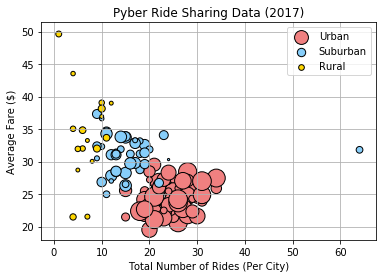

In [40]:
#Bubble plot of ride sharing data
plt.scatter(urban_total_rides, urban_avg_fares, marker = "o" , facecolors = "lightcoral", edgecolors = "black", s = 5*urban_total_drivers, label = "Urban")
plt.scatter(suburban_total_rides, suburban_avg_fares, marker = "o", facecolors = "lightskyblue", edgecolors = "black", s = 5*suburban_total_drivers, label = "Suburban")
plt.scatter(rural_total_rides, rural_avg_fares, marker = "o", facecolors = "gold", edgecolors = "black", s = 5*rural_total_drivers, label = "Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2017)")
plt.legend()
plt.grid()
plt.show()

Note: Bubble size is proportional to number of drivers

# Total Fares by City Type

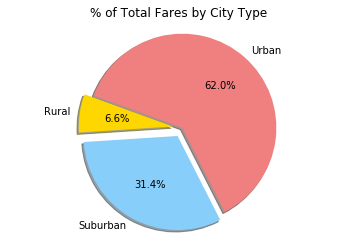

In [37]:
#pie chart of total fares by city type
city_type_groups = combined_data.groupby("type")
total_fares = city_type_groups["fare"].sum()
combined_fares = combined_data["fare"].sum()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0.1, 0.1, 0]
city_types = city_type_groups.groups.keys()
plt.pie(total_fares, explode = explode, labels = city_types, colors = colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()


# Total Rides by City Type

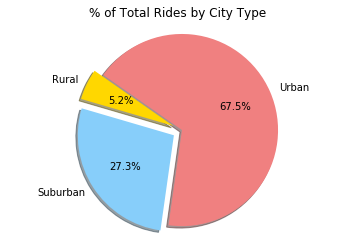

In [38]:
#pie chart of total rides by city type
total_rides = city_type_groups["ride_id"].count()
plt.pie(total_rides, explode = explode, labels = city_types, colors = colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()


# Total Drivers by City Type

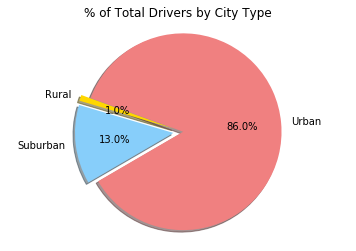

In [39]:
#pie chart of total drivers by city type
total_drivers = city_type_groups["driver_count"].sum()
explode2 = [0.1, 0.1, 0]
plt.pie(total_drivers, explode = explode2, labels = city_types, colors = colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()